In [1]:
import numpy as np
import pandas as pd
import math

### Load data csv

In [2]:
df = pd.read_csv('./data.csv', sep='|', dtype={"client_id": str})
df.head()

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
0,5856970,1.0,2018-10-01,2013-10-23,2019-01-10,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,1.0,Yes,Yes,NaN,NaN
1,6371753,0.0,2018-09-01,2015-07-29,2018-06-02,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN
2,5928737,0.0,2019-01-01,2016-08-31,2018-12-27,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN
3,475064,0.0,2018-12-01,2014-07-13,2017-11-30,No,Yes,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,NaN,NaN
4,3615172,0.0,2018-09-01,2017-12-27,2017-12-28,No,No,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,NaN,NaN


In [106]:
cols = [col for col in df.columns if col not in ['client_id', 'Target', 'Month']]
print(len(cols))
cols

74


['First_product_dt',
 'Last_product_dt',
 'CreditCard_Premium',
 'CreditCard_Active',
 'CreditCard_CoBranding',
 'Loan_Active',
 'Mortgage_Active',
 'SavingAccount_Active_ARG_Salary',
 'SavingAccount_Active_ARG',
 'SavingAccount_Active_DOLLAR',
 'DebitCard_Active',
 'Investment_Active',
 'Package_Active',
 'Insurance_Life',
 'Insurance_Home',
 'Insurance_Accidents',
 'Insurance_Mobile',
 'Insurance_ATM',
 'Insurance_Unemployment',
 'Sex',
 'Client_Age_grp',
 'SavingAccount_Balance_FirstDate',
 'SavingAccount_Balance_LastDate',
 'SavingAccount_Balance_Average',
 'SavingAccount_Days_with_use',
 'SavingAccount_Days_with_Credits',
 'SavingAccount_Days_with_Debits',
 'SavingAccount_Salary_Payment_Transactions',
 'SavingAccount_Transfer_In_Transactions',
 'SavingAccount_ATM_Extraction_Transactions',
 'SavingAccount_Service_Payment_Transactions',
 'SavingAccount_CreditCard_Payment_Transactions',
 'SavingAccount_Transfer_Out_Transactions',
 'SavingAccount_DebitCard_Spend_Transactions',
 'Savin

In [101]:
def countColumns(substring):
    cols = [col for col in df.columns if substring in col]
    print(len(cols))
    return cols

In [114]:
def countColumnsStart(substring):
    cols = [col for col in df.columns if col.startswith(substring)]
    print(len(cols))
    return cols

In [119]:
countColumnsStart('Opera')

7


['Operations_Bank',
 'Operations_Terminal',
 'Operations_HomeBanking',
 'Operations_Mobile',
 'Operations_Ivr',
 'Operations_Telemarketer',
 'Operations_ATM']

In [113]:
countColumns('Active')

9


['CreditCard_Active',
 'Loan_Active',
 'Mortgage_Active',
 'SavingAccount_Active_ARG_Salary',
 'SavingAccount_Active_ARG',
 'SavingAccount_Active_DOLLAR',
 'DebitCard_Active',
 'Investment_Active',
 'Package_Active']

In [3]:
def toDatetime(column):
    return pd.to_datetime(df[column], format="%Y-%m-%d")

Replace dates columns with datetime types instead of "object"

In [4]:
df['Month'] = toDatetime('Month')
df['First_product_dt'] = toDatetime('First_product_dt')
df['Last_product_dt'] = toDatetime('Last_product_dt')

In [5]:
max(df['Month'])

Timestamp('2019-04-01 00:00:00')

In [6]:
yes_no_columns = [
    "CreditCard_Premium",
    "CreditCard_Active",
    "CreditCard_CoBranding",
    "Loan_Active",
    "Mortgage_Active",
    "SavingAccount_Active_ARG_Salary",
    "SavingAccount_Active_ARG",
    "SavingAccount_Active_DOLLAR",
    "DebitCard_Active",
    "Investment_Active",
    "Package_Active",
    "Insurance_Life",
    "Insurance_Home",
    "Insurance_Accidents",
    "Insurance_Mobile",
    "Insurance_ATM",
    "Insurance_Unemployment",
    "Mobile",
    "Email"
]

eplace yes/no columns values by bools

In [7]:
for col in yes_no_columns:
    df[col] = df[col].apply(lambda x: x == 'Yes')

In [8]:
df.head()

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
0,5856970,1.0,2018-10-01,2013-10-23,2019-01-10,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,True,True,NaN,NaN
1,6371753,0.0,2018-09-01,2015-07-29,2018-06-02,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,NaN,NaN
2,5928737,0.0,2019-01-01,2016-08-31,2018-12-27,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
3,475064,0.0,2018-12-01,2014-07-13,2017-11-30,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
4,3615172,0.0,2018-09-01,2017-12-27,2017-12-28,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,NaN,NaN


### Number of columns

In [9]:
len(df.columns)

77

### Number of rows

In [10]:
len(df)

238615

### Number of columns related to saving account

In [11]:
saving_account_columns = [col for col in df.columns if col.startswith('SavingAccount_')]
len(saving_account_columns)

29

### Number of months

In [12]:
months = pd.unique(df['Month'].sort_values())
len(months)

9

In [13]:
months

array(['2018-08-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000'], dtype='datetime64[ns]')

### Time windows

In [14]:
historical_window = months[:-3]
lead_window = months[-3:-2]
prediction_window = months[-2:]

In [15]:
historical_window

array(['2018-08-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [16]:
lead_window

array(['2019-02-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
prediction_window

array(['2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

### Number of clients

In [18]:
clients = pd.unique(df[df['client_id'].notnull()]['client_id'])
len(clients)

26560

### Clients with 9 months of data

To have clients with similar ammount of data and give them the same weight

In [19]:
months_by_client = df.groupby('client_id')['Month'].agg([np.count_nonzero]).reset_index()
months_by_client.count_nonzero.value_counts()

9    26483
2       38
8        9
7        9
3        9
4        6
1        6
Name: count_nonzero, dtype: int64

In [20]:
ids = months_by_client.loc[months_by_client['count_nonzero'] == 9]['client_id']
ids = pd.unique(ids)

In [21]:
id_mask = df['client_id'].isin(ids)
clients_with_nine_months = df.loc[id_mask]
clients_with_nine_months

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
0,5856970,1.0,2018-10-01,2013-10-23,2019-01-10,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,True,True,NaN,NaN
1,6371753,0.0,2018-09-01,2015-07-29,2018-06-02,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,NaN,NaN
2,5928737,0.0,2019-01-01,2016-08-31,2018-12-27,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
3,475064,0.0,2018-12-01,2014-07-13,2017-11-30,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
4,3615172,0.0,2018-09-01,2017-12-27,2017-12-28,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238610,6448833,0.0,2019-03-01,2016-05-09,2019-04-02,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,REGION NORTE GRANDE ARGENTINO,NaN
238611,6377583,0.0,2019-04-01,2015-06-03,2019-01-04,False,True,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,BUENOS AIRES,J55660104XX012
238612,6412619,0.0,2019-01-01,2015-07-08,2018-06-02,False,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,NaN,NaN
238613,5542402,0.0,2019-04-01,2012-09-13,2012-09-13,False,True,False,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,False,True,REGION NORTE GRANDE ARGENTINO,J55660104XX012


### Clients without an active package

Looking for packages in the most updated month in the historical window

In [22]:
query_month = historical_window[-1]
query_month

numpy.datetime64('2019-01-01T00:00:00.000000000')

In [23]:
month_mask = df['Month'] == query_month
no_active_package_mask = df['Package_Active'] == False
clients_without_package = df.loc[month_mask & no_active_package_mask]
clients_without_package

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
2,5928737,0.0,2019-01-01,2016-08-31,2018-12-27,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
10,6018047,1.0,2019-01-01,2014-04-29,2017-05-31,True,True,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,True,True,NaN,NaN
11,5359038,1.0,2019-01-01,2016-01-07,2017-05-24,True,True,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
16,6890812,0.0,2019-01-01,2017-06-09,2018-08-27,False,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
20,115383,0.0,2019-01-01,2004-07-30,2004-07-30,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238573,6570413,0.0,2019-01-01,2015-12-04,2018-11-02,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
238574,6258895,0.0,2019-01-01,2015-03-12,2018-03-02,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
238585,6397274,0.0,2019-01-01,2015-06-23,2015-06-23,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,False,True,NaN,NaN
238586,6007291,0.0,2019-01-01,2014-04-13,2014-04-13,True,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,False,False,NaN,NaN


### Merge data to create an universe

In [24]:
merged_df = clients_with_nine_months.merge(
    clients_without_package,
    how='inner',
    on=['client_id']
)[['client_id']].drop_duplicates()
print(merged_df.shape)
merged_df.head()

(26006, 1)


,client_id
0,5856970
9,6371753
18,5928737
27,475064
36,3615172


In [25]:
universe_df = df.merge(merged_df, how='inner', on='client_id')
universe_df

,client_id,Target,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,...,CreditCard_Payment_External,CreditCard_Payment_Cash,CreditCard_Payment_Web,CreditCard_Payment_ATM,CreditCard_Payment_TAS,Investment_Numbers,Mobile,Email,Region,CreditCard_Product
0,5856970,1.0,2018-10-01,2013-10-23,2019-01-10,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,True,True,NaN,NaN
1,5856970,1.0,2018-12-01,2013-10-23,2019-01-10,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,True,True,NaN,NaN
2,5856970,1.0,2019-03-01,2013-10-23,2019-03-19,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,2.0,True,True,AMBA Resto,J55660202XX012
3,5856970,1.0,2018-09-01,2013-10-23,2019-01-10,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
4,5856970,1.0,2019-02-01,2013-10-23,2019-01-10,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,True,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234049,3854449,1.0,2019-04-01,2007-11-29,2007-12-06,False,True,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,True,True,REGION CUYO,J55660102XX012
234050,3854449,1.0,2019-01-01,2007-11-29,2007-12-06,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN
234051,3854449,1.0,2019-03-01,2007-11-29,2007-12-06,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,True,True,REGION CUYO,J55660102XX012
234052,3854449,1.0,2018-08-01,2007-11-29,2007-12-06,False,True,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,True,True,NaN,NaN


### Target

In [26]:
clients = universe_df[['client_id', 'Target']].drop_duplicates()
clients['Target'].value_counts()

0.0    19177
1.0     6829
Name: Target, dtype: int64

In [27]:
f"Target is ~{round(6829 / (6829 + 19177) * 100)}%"

'Target is ~26%'

The target is **unbalanced**.

We could randomly get 6829 clients from the 19177 non target ones to have a 50/50 distribution.

### Training window

In [28]:
historical_window

array(['2018-08-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [29]:
training_mask = universe_df['Month'].isin(historical_window)
training_df = universe_df.loc[training_mask]
training_df['Month'].value_counts()

2018-10-01    26006
2018-12-01    26006
2018-09-01    26006
2018-08-01    26006
2019-01-01    26006
2018-11-01    26006
Name: Month, dtype: int64

In [30]:
training_df.shape

(156036, 77)

In [31]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156036 entries, 0 to 234053
Data columns (total 77 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   client_id                                      156036 non-null  object        
 1   Target                                         156036 non-null  float64       
 2   Month                                          156036 non-null  datetime64[ns]
 3   First_product_dt                               156036 non-null  datetime64[ns]
 4   Last_product_dt                                156036 non-null  datetime64[ns]
 5   CreditCard_Premium                             156036 non-null  bool          
 6   CreditCard_Active                              156036 non-null  bool          
 7   CreditCard_CoBranding                          156036 non-null  bool          
 8   Loan_Active                                 

### Features

In [32]:
training_df.columns

Index(['client_id', 'Target', 'Month', 'First_product_dt', 'Last_product_dt',
       'CreditCard_Premium', 'CreditCard_Active', 'CreditCard_CoBranding',
       'Loan_Active', 'Mortgage_Active', 'SavingAccount_Active_ARG_Salary',
       'SavingAccount_Active_ARG', 'SavingAccount_Active_DOLLAR',
       'DebitCard_Active', 'Investment_Active', 'Package_Active',
       'Insurance_Life', 'Insurance_Home', 'Insurance_Accidents',
       'Insurance_Mobile', 'Insurance_ATM', 'Insurance_Unemployment', 'Sex',
       'Client_Age_grp', 'SavingAccount_Balance_FirstDate',
       'SavingAccount_Balance_LastDate', 'SavingAccount_Balance_Average',
       'SavingAccount_Days_with_use', 'SavingAccount_Days_with_Credits',
       'SavingAccount_Days_with_Debits',
       'SavingAccount_Salary_Payment_Transactions',
       'SavingAccount_Transfer_In_Transactions',
       'SavingAccount_ATM_Extraction_Transactions',
       'SavingAccount_Service_Payment_Transactions',
       'SavingAccount_CreditCard_Payment_T

In [33]:
last_historical_month = training_df['Month'] == historical_window[-1]
identity_features = [
    'client_id',
    'Month',
    'First_product_dt', 'Last_product_dt',
    'CreditCard_Premium', 'CreditCard_Active', 'CreditCard_CoBranding', 'CreditCard_Product',
    'Loan_Active', 'Mortgage_Active',
    'SavingAccount_Active_ARG_Salary', 'SavingAccount_Active_ARG', 'SavingAccount_Active_DOLLAR',
    'DebitCard_Active', 'Investment_Active',
    'Insurance_Life', 'Insurance_Home', 'Insurance_Accidents', 'Insurance_Mobile', 'Insurance_ATM', 'Insurance_Unemployment',
    'Sex', 'Client_Age_grp', 'Email', 'Mobile',
    'Region',
    'Operations_Terminal', 'Operations_HomeBanking', 'Operations_Mobile',
    'Operations_Ivr', 'Operations_Telemarketer', 'Operations_ATM'
]
print(len(identity_features) - 1)
universe_df = training_df.loc[last_historical_month]
identity_df = universe_df[identity_features].drop_duplicates()
identity_df.head()

31


,client_id,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,CreditCard_Product,Loan_Active,Mortgage_Active,...,Client_Age_grp,Email,Mobile,Region,Operations_Terminal,Operations_HomeBanking,Operations_Mobile,Operations_Ivr,Operations_Telemarketer,Operations_ATM
7,5856970,2019-01-01,2013-10-23,2019-01-10,False,True,False,NaN,False,False,...,Mayor a 70 años,True,True,NaN,1.0,3.0,0.0,0.0,0.0,0.0
13,6371753,2019-01-01,2015-07-29,2018-06-02,False,False,False,NaN,False,False,...,Entre 50 y 59 años,False,True,NaN,0.0,3.0,0.0,0.0,0.0,0.0
18,5928737,2019-01-01,2016-08-31,2018-12-27,False,False,False,NaN,False,False,...,Entre 30 y 39 años,True,True,NaN,0.0,0.0,0.0,0.0,0.0,0.0
29,475064,2019-01-01,2014-07-13,2017-11-30,False,True,False,NaN,False,False,...,Mayor a 70 años,True,True,NaN,2.0,0.0,0.0,0.0,0.0,0.0
39,3615172,2019-01-01,2017-12-27,2017-12-28,False,False,False,NaN,False,False,...,Entre 40 y 49 años,False,True,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
identity_df['CreditCard_Product'].value_counts(dropna=False)

NaN    26006
Name: CreditCard_Product, dtype: int64

## Missing values

Fixing missing values with `CreditCard_Product`

In [35]:
# No one hast a credit card product on the training months
training_df['CreditCard_Product'].value_counts(dropna=False)

NaN    156036
Name: CreditCard_Product, dtype: int64

In [36]:
# But we have clients with credit card products on the prediction months
# I'll use this to fill this feature nan values
last_month_df = df.loc[df['Month'].isin(prediction_window)][['client_id', 'CreditCard_Product']]
last_month_df = last_month_df.groupby('client_id').first()
last_month_df['CreditCard_Product'].value_counts(dropna=False)

J55660104XX012    8663
NaN               8205
J55660202XX012    6032
J55660124XX012    2491
J55660102XX012     417
J55660123XX012     388
J55660702XX012     288
J55661002XX012      67
Name: CreditCard_Product, dtype: int64

In [37]:
# Drop the column that we will replace
identity_df.drop('CreditCard_Product', axis=1, inplace=True)
identity_df = identity_df.merge(last_month_df, how='left', on='client_id')

In [38]:
identity_df.groupby(['CreditCard_Active', 'CreditCard_Product']).size()

CreditCard_Active  CreditCard_Product
False              J55660102XX012           7
                   J55660104XX012         156
                   J55660123XX012           7
                   J55660124XX012          37
                   J55660202XX012         100
                   J55660702XX012          15
                   J55661002XX012           3
True               J55660102XX012         404
                   J55660104XX012        8283
                   J55660123XX012         365
                   J55660124XX012        2430
                   J55660202XX012        5785
                   J55660702XX012         251
                   J55661002XX012          58
dtype: int64

In [39]:
# After the merge we find clients with "CreditCard_Active" == False but 
# a not null "CreditCard_Product", we fix it here:
identity_df.loc[identity_df['CreditCard_Active'] == False, 'CreditCard_Product'] = np.nan
identity_df.groupby(['CreditCard_Active', 'CreditCard_Product'], dropna=False).size()

CreditCard_Active  CreditCard_Product
False              NaN                   8168
True               J55660102XX012         404
                   J55660104XX012        8283
                   J55660123XX012         365
                   J55660124XX012        2430
                   J55660202XX012        5785
                   J55660702XX012         251
                   J55661002XX012          58
                   NaN                    262
dtype: int64

In [40]:
# We have now 262 clients that have CreditCard_Active == True but no CreditCard_Product
# I'll set those as client with no active product
identity_df.loc[identity_df['CreditCard_Product'].isnull(), 'CreditCard_Active'] = False
identity_df.groupby(['CreditCard_Active', 'CreditCard_Product'], dropna=False).size()

CreditCard_Active  CreditCard_Product
False              NaN                   8430
True               J55660102XX012         404
                   J55660104XX012        8283
                   J55660123XX012         365
                   J55660124XX012        2430
                   J55660202XX012        5785
                   J55660702XX012         251
                   J55661002XX012          58
dtype: int64

In [41]:
identity_df['CreditCard_Product'] = identity_df['CreditCard_Product'].fillna('No Product')
identity_df

,client_id,Month,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,SavingAccount_Active_ARG_Salary,...,Email,Mobile,Region,Operations_Terminal,Operations_HomeBanking,Operations_Mobile,Operations_Ivr,Operations_Telemarketer,Operations_ATM,CreditCard_Product
0,5856970,2019-01-01,2013-10-23,2019-01-10,False,True,False,False,False,False,...,True,True,NaN,1.0,3.0,0.0,0.0,0.0,0.0,J55660202XX012
1,6371753,2019-01-01,2015-07-29,2018-06-02,False,False,False,False,False,False,...,False,True,NaN,0.0,3.0,0.0,0.0,0.0,0.0,No Product
2,5928737,2019-01-01,2016-08-31,2018-12-27,False,False,False,False,False,False,...,True,True,NaN,0.0,0.0,0.0,0.0,0.0,0.0,No Product
3,475064,2019-01-01,2014-07-13,2017-11-30,False,True,False,False,False,False,...,True,True,NaN,2.0,0.0,0.0,0.0,0.0,0.0,J55660202XX012
4,3615172,2019-01-01,2017-12-27,2017-12-28,False,False,False,False,False,False,...,False,True,NaN,0.0,0.0,0.0,0.0,0.0,0.0,No Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26001,1988103,2019-01-01,2006-09-21,2006-09-21,False,True,False,False,False,False,...,False,True,NaN,0.0,0.0,0.0,1.0,0.0,0.0,J55660104XX012
26002,4908119,2019-01-01,2010-12-06,2014-07-10,False,False,False,False,False,False,...,True,True,NaN,0.0,0.0,0.0,0.0,0.0,0.0,No Product
26003,5744054,2019-01-01,2013-06-18,2018-02-16,False,True,True,True,False,False,...,False,True,NaN,1.0,0.0,0.0,0.0,0.0,0.0,J55660124XX012
26004,3028372,2019-01-01,2011-07-26,2011-07-26,False,True,False,False,False,False,...,True,True,NaN,2.0,7.0,0.0,0.0,0.0,0.0,J55660202XX012


----
Fixing missing values with `Region`

In [42]:
# Same issue with region, no one has it in our universe
identity_df['Region'].value_counts(dropna=False)

NaN    26006
Name: Region, dtype: int64

In [43]:
# I'll pick the region from the prediction months
last_month_df = df.loc[df['Month'].isin(prediction_window)][['client_id', 'Region']]
last_month_df = last_month_df.groupby('client_id').first()
last_month_df['Region'].value_counts(dropna=False)

BUENOS AIRES                     7147
REGION CENTRO                    5868
REGION NORTE GRANDE ARGENTINO    5072
REGION PATAGONICA                2485
CABA Centro/Norte                2114
REGION CUYO                      1991
AMBA Resto                       1867
NaN                                 7
Name: Region, dtype: int64

In [44]:
# Drop the column that we will replace
identity_df.drop('Region', axis=1, inplace=True)
identity_df = identity_df.merge(last_month_df, how='left', on='client_id')
# Fill nan region
identity_df.loc[identity_df['Region'].isnull(), 'Region'] = 'NO REGION'
identity_df['Region'].value_counts(dropna=False)

BUENOS AIRES                     6991
REGION CENTRO                    5768
REGION NORTE GRANDE ARGENTINO    4966
REGION PATAGONICA                2437
CABA Centro/Norte                2050
REGION CUYO                      1960
AMBA Resto                       1828
NO REGION                           6
Name: Region, dtype: int64

## Transform Features

In [120]:
identity_df['Client_Age_grp'].value_counts(dropna=False)

Entre 40 y 49 años    7265
Entre 30 y 39 años    5875
Entre 50 y 59 años    5740
Entre 60 y 64 años    2408
Entre 65 y 69 años    1991
Mayor a 70 años       1602
Entre 18 y 29 años    1125
Name: Client_Age_grp, dtype: int64

In [46]:
transform_df = identity_df[['client_id']]

In [47]:
age_map = {
    'Entre 18 y 29 años': 1,
    'Entre 30 y 39 años': 2,
    'Entre 40 y 49 años': 3,
    'Entre 50 y 59 años': 4,
    'Entre 60 y 64 años': 5,
    'Entre 65 y 69 años': 6,
    'Mayor a 70 años': 7
}
transform_df['client_age_group_ordinal'] = identity_df['Client_Age_grp'].map(age_map)
transform_df['client_age_group_ordinal'].value_counts()

/var/folders/jk/29gxdjqn4vv9c_bd8kgzftj40000gn/T/ipykernel_97644/941940720.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df['client_age_group_ordinal'] = identity_df['Client_Age_grp'].map(age_map)


3    7265
2    5875
4    5740
5    2408
6    1991
7    1602
1    1125
Name: client_age_group_ordinal, dtype: int64

In [48]:
sex_map = {
    'F': 1,
    'M': 2,
}
transform_df['sex_ordinal'] = identity_df['Sex'].map(sex_map)
transform_df['sex_ordinal'].value_counts()

/var/folders/jk/29gxdjqn4vv9c_bd8kgzftj40000gn/T/ipykernel_97644/4144696729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df['sex_ordinal'] = identity_df['Sex'].map(sex_map)


2    14835
1    11171
Name: sex_ordinal, dtype: int64

In [49]:
region_map = {
    'BUENOS AIRES':  1,
    'REGION CENTRO': 2,
    'REGION NORTE GRANDE ARGENTINO': 3,
    'REGION PATAGONICA': 4,
    'CABA Centro/Norte': 5,
    'REGION CUYO': 6, 
    'AMBA Resto': 7,
    'NO REGION': 8
}
transform_df['region_ordinal'] = identity_df['Region'].map(region_map)
transform_df['region_ordinal'].value_counts()

/var/folders/jk/29gxdjqn4vv9c_bd8kgzftj40000gn/T/ipykernel_97644/1087769956.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df['region_ordinal'] = identity_df['Region'].map(region_map)


1    6991
2    5768
3    4966
4    2437
5    2050
6    1960
7    1828
8       6
Name: region_ordinal, dtype: int64

In [50]:
ccp_map = {
 'No Product':  1,
 'J55660102XX012': 2,
 'J55660104XX012': 3,
 'J55660123XX012': 4,
 'J55660124XX012': 5,
 'J55660202XX012': 6, 
 'J55660702XX012': 7,
 'J55661002XX012': 8
}
transform_df['credit_card_product_ordinal'] = identity_df['CreditCard_Product'].map(ccp_map)
transform_df['credit_card_product_ordinal'].value_counts()

/var/folders/jk/29gxdjqn4vv9c_bd8kgzftj40000gn/T/ipykernel_97644/649605817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df['credit_card_product_ordinal'] = identity_df['CreditCard_Product'].map(ccp_map)


1    8430
3    8283
6    5785
5    2430
2     404
4     365
7     251
8      58
Name: credit_card_product_ordinal, dtype: int64

I had chosen insurance columns as identity ones but none of the 26006 clients has an insurance product

In [51]:
insurance_columns = [c for c in identity_df.columns if c.startswith('Insurance_')]
identity_df[insurance_columns].value_counts()

Insurance_Life  Insurance_Home  Insurance_Accidents  Insurance_Mobile  Insurance_ATM  Insurance_Unemployment
False           False           False                False             False          False                     26006
dtype: int64

In [52]:
identity_df.drop(insurance_columns, axis=1, inplace=True)

In [53]:
product_columns = [
    'CreditCard_Active', 'Loan_Active', 'Mortgage_Active',
    'SavingAccount_Active_ARG_Salary', 'SavingAccount_Active_ARG',
    'SavingAccount_Active_DOLLAR', 'DebitCard_Active', 'Investment_Active'
]
transform_df['n_of_products_active'] = identity_df[product_columns].replace({True: 1, False: 0}).sum(axis=1)
transform_df['n_of_products_active'].value_counts()

/var/folders/jk/29gxdjqn4vv9c_bd8kgzftj40000gn/T/ipykernel_97644/3126301847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df['n_of_products_active'] = identity_df[product_columns].replace({True: 1, False: 0}).sum(axis=1)


1    8716
3    6113
4    5704
5    2525
2    2405
6     490
7      33
0      20
Name: n_of_products_active, dtype: int64

In [54]:
len(identity_df.columns)

26

In [55]:
universe_df[['First_product_dt', 'Last_product_dt', 'Month']]

,First_product_dt,Last_product_dt,Month
7,2013-10-23,2019-01-10,2019-01-01
13,2015-07-29,2018-06-02,2019-01-01
18,2016-08-31,2018-12-27,2019-01-01
29,2014-07-13,2017-11-30,2019-01-01
39,2017-12-27,2017-12-28,2019-01-01
...,...,...,...
234014,2006-09-21,2006-09-21,2019-01-01
234023,2010-12-06,2014-07-10,2019-01-01
234032,2013-06-18,2018-02-16,2019-01-01
234039,2011-07-26,2011-07-26,2019-01-01


In [56]:
months_from_last_product = abs(round((identity_df['Month'] - identity_df['Last_product_dt']) / np.timedelta64(1, "M")))
months_from_first_product = abs(round((identity_df['Month'] - identity_df['First_product_dt']) / np.timedelta64(1, "M")))
transform_df['months_from_last_product'] = months_from_last_product
transform_df['months_from_first_product'] = months_from_first_product
transform_df.head()

/var/folders/jk/29gxdjqn4vv9c_bd8kgzftj40000gn/T/ipykernel_97644/2020126545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df['months_from_last_product'] = months_from_last_product
/var/folders/jk/29gxdjqn4vv9c_bd8kgzftj40000gn/T/ipykernel_97644/2020126545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df['months_from_first_product'] = months_from_first_product


,client_id,client_age_group_ordinal,sex_ordinal,region_ordinal,credit_card_product_ordinal,n_of_products_active,months_from_last_product,months_from_first_product
0,5856970,7,1,7,6,5,0.0,62.0
1,6371753,4,1,2,1,3,7.0,41.0
2,5928737,2,2,3,1,3,0.0,28.0
3,475064,7,1,6,6,3,13.0,54.0
4,3615172,3,2,2,1,2,12.0,12.0


#### Transform features for saving account balance (sum and rate)

In [57]:
balance_in_6 = training_df[['client_id', 'Month', 'SavingAccount_Balance_Average']].groupby('client_id')['SavingAccount_Balance_Average']
balance_in_3 = training_df[training_df['Month'].isin(historical_window[-3:])][['client_id', 'Month', 'SavingAccount_Balance_Average']].groupby('client_id')['SavingAccount_Balance_Average']

In [58]:
balance_avg_6 = pd.DataFrame(balance_in_6.mean()).rename(columns={'SavingAccount_Balance_Average': 'saving_account_balance_6_months_average'})
balance_avg_3 = pd.DataFrame(balance_in_3.mean()).rename(columns={'SavingAccount_Balance_Average': 'saving_account_balance_3_months_average'})

In [59]:
transform_df = transform_df  \
    .merge(balance_avg_6, how='left', on='client_id') \
    .merge(balance_avg_3, how='left', on='client_id')
transform_df['balance_rate_3v6'] = np.where(
    transform_df['saving_account_balance_6_months_average'] == 0,
    transform_df['saving_account_balance_3_months_average'],
    transform_df['saving_account_balance_3_months_average'] / transform_df['saving_account_balance_6_months_average']
)

#### Transform features for oprations

In [60]:
operations_cols = [
    'Operations_Bank',
    'Operations_Terminal',
    'Operations_HomeBanking',
    'Operations_Mobile',
    'Operations_Ivr',
    'Operations_Telemarketer',
    'Operations_ATM',
]
operations_df = pd.DataFrame(training_df.groupby('client_id')[operations_cols].sum()[operations_cols].sum(axis=1)).rename(columns={0: 'n_operations'})
transform_df = transform_df.merge(operations_df, how='left', on='client_id')

#### Transform features for debit vs credit

In [61]:
total_debit = training_df[['client_id', 'CreditCard_Total_Spending']].groupby('client_id').sum()

In [62]:
total_credit = training_df[['client_id', 'SavingAccount_DebitCard_Spend_Amount']].groupby('client_id').sum()

In [63]:
credit_debit_df = total_debit.merge(total_credit, how='left', on='client_id')

In [64]:
credit_debit_df['credit_vs_debit'] = np.where(
    credit_debit_df['SavingAccount_DebitCard_Spend_Amount'] == 0,
    credit_debit_df['CreditCard_Total_Spending'],
    (credit_debit_df['CreditCard_Total_Spending'] / credit_debit_df['SavingAccount_DebitCard_Spend_Amount'])
)
credit_debit_df.head()

,CreditCard_Total_Spending,SavingAccount_DebitCard_Spend_Amount,credit_vs_debit
client_id,,,
1000199,60458.12,0.0,60458.12
1000245,0.00,0.0,0.00
1000847,0.00,0.0,0.00
1001232,26210.29,0.0,26210.29
1001450,18720.50,0.0,18720.50


In [65]:
transform_df = transform_df.merge(credit_debit_df, how='left', on='client_id')

#### Transform features for salary

In [66]:
salary_df = pd.DataFrame(
    training_df.groupby('client_id')['SavingAccount_Salary_Payment_Amount'].max()
).rename(columns={
    "SavingAccount_Salary_Payment_Amount": 'max_salary_payment_amount'
})
salary_df['with_salary'] = np.where(salary_df['max_salary_payment_amount'] > 0, 1, 0)
salary_df

,max_salary_payment_amount,with_salary
client_id,,
1000199,0.00,0
1000245,0.00,0
1000847,0.00,0
1001232,0.00,0
1001450,0.00,0
...,...,...
99842,92256.45,1
998420,277834.30,1
998768,0.00,0


In [67]:
transform_df = transform_df.merge(salary_df, how='left', on='client_id')

In [68]:
transform_df.head()

,client_id,client_age_group_ordinal,sex_ordinal,region_ordinal,credit_card_product_ordinal,n_of_products_active,months_from_last_product,months_from_first_product,saving_account_balance_6_months_average,saving_account_balance_3_months_average,balance_rate_3v6,n_operations,CreditCard_Total_Spending,SavingAccount_DebitCard_Spend_Amount,credit_vs_debit,max_salary_payment_amount,with_salary
0,5856970,7,1,7,6,5,0.0,62.0,1732.670000,1414.78,0.816532,35.0,59462.92,2930.78,20.289111,0.0,0
1,6371753,4,1,2,1,3,7.0,41.0,533.373333,712.46,1.335762,15.0,0.00,0.00,0.000000,0.0,0
2,5928737,2,2,3,1,3,0.0,28.0,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,0
3,475064,7,1,6,6,3,13.0,54.0,2230.715000,2790.00,1.250720,13.0,28691.03,0.00,28691.030000,0.0,0
4,3615172,3,2,2,1,2,12.0,12.0,0.400000,0.40,1.000000,0.0,0.00,0.00,0.000000,0.0,0


## Aggregate features

In [69]:
operations = [
    np.min, np.max, np.mean, np.median, np.sum, np.count_nonzero, np.var
]
aggregate_columns = [
    'SavingAccount_Salary_Payment_Amount',
    'SavingAccount_Total_Amount',
    'SavingAccount_Credits_Amounts',
    'SavingAccount_Debits_Amounts'
]

In [70]:
aggregate_df = training_df.groupby('client_id')[aggregate_columns].agg(operations)
aggregate_df.columns = ['_'.join(x) for x in np.array(aggregate_df.columns)]
aggregate_df.head()

,SavingAccount_Salary_Payment_Amount_amin,SavingAccount_Salary_Payment_Amount_amax,SavingAccount_Salary_Payment_Amount_mean,SavingAccount_Salary_Payment_Amount_median,SavingAccount_Salary_Payment_Amount_sum,SavingAccount_Salary_Payment_Amount_count_nonzero,SavingAccount_Salary_Payment_Amount_var,SavingAccount_Total_Amount_amin,SavingAccount_Total_Amount_amax,SavingAccount_Total_Amount_mean,...,SavingAccount_Credits_Amounts_sum,SavingAccount_Credits_Amounts_count_nonzero,SavingAccount_Credits_Amounts_var,SavingAccount_Debits_Amounts_amin,SavingAccount_Debits_Amounts_amax,SavingAccount_Debits_Amounts_mean,SavingAccount_Debits_Amounts_median,SavingAccount_Debits_Amounts_sum,SavingAccount_Debits_Amounts_count_nonzero,SavingAccount_Debits_Amounts_var
client_id,,,,,,,,,,,,,,,,,,,,,
1000199,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,6900.00,5421.333333,...,16264.00,5,1.782249e+06,0.0,3450.0,2710.666667,3187.5,16264.00,5,1.785074e+06
1000245,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,46000.48,12739.410000,...,38218.54,2,1.034337e+08,0.0,23000.0,6369.653333,0.0,38217.92,2,1.034300e+08
1000847,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000000,...,0.00,0,0.000000e+00,0.0,0.0,0.000000,0.0,0.00,0,0.000000e+00
1001232,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000000,...,0.00,0,0.000000e+00,0.0,0.0,0.000000,0.0,0.00,0,0.000000e+00
1001450,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,11640.16,1940.053333,...,5820.16,1,5.645710e+06,0.0,5820.0,970.026667,0.0,5820.16,2,5.645338e+06


# ABT

In [71]:
abt = clients \
    .merge(identity_df, on='client_id') \
    .merge(transform_df, on='client_id') \
    .merge(aggregate_df, on='client_id')
abt = abt.replace({True: 1, False: 0})
abt = abt.drop(['Month', 'Sex', 'Client_Age_grp', 'Region', 'CreditCard_Product'], axis=1)
abt.head()

,client_id,Target,First_product_dt,Last_product_dt,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,SavingAccount_Active_ARG_Salary,...,SavingAccount_Credits_Amounts_sum,SavingAccount_Credits_Amounts_count_nonzero,SavingAccount_Credits_Amounts_var,SavingAccount_Debits_Amounts_amin,SavingAccount_Debits_Amounts_amax,SavingAccount_Debits_Amounts_mean,SavingAccount_Debits_Amounts_median,SavingAccount_Debits_Amounts_sum,SavingAccount_Debits_Amounts_count_nonzero,SavingAccount_Debits_Amounts_var
0,5856970,1.0,2013-10-23,2019-01-10,0,1,0,0,0,0,...,791768.98,6,3.359124e+09,13779.39,157510.79,131985.461667,154910.640,791912.77,6,3.355707e+09
1,6371753,0.0,2015-07-29,2018-06-02,0,0,0,0,0,0,...,23139.99,6,2.667693e+04,3823.12,3982.63,3870.886667,3852.720,23225.32,6,3.415290e+03
2,5928737,0.0,2016-08-31,2018-12-27,0,0,0,0,0,0,...,0.00,0,0.000000e+00,0.00,0.00,0.000000,0.000,0.00,0,0.000000e+00
3,475064,0.0,2014-07-13,2017-11-30,0,1,0,0,0,0,...,33400.87,6,1.102714e+07,2585.28,11160.84,5366.315000,3980.385,32197.89,6,9.876703e+06
4,3615172,0.0,2017-12-27,2017-12-28,0,0,0,0,0,0,...,0.00,0,0.000000e+00,0.00,0.00,0.000000,0.000,0.00,0,0.000000e+00


In [72]:
now = pd.Timestamp('2019-04-01 00:00:00')
abt['first_product_timedelta'] = (now - abt['First_product_dt']).dt.days.astype(int)
abt['last_product_timedelta'] = (now - abt['Last_product_dt']).dt.days.astype(int)
abt = abt.drop(['First_product_dt', 'Last_product_dt'], axis=1)

In [73]:
abt.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26006 entries, 0 to 26005
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   client_id                                          26006 non-null  object 
 1   Target                                             26006 non-null  float64
 2   CreditCard_Premium                                 26006 non-null  int64  
 3   CreditCard_Active                                  26006 non-null  int64  
 4   CreditCard_CoBranding                              26006 non-null  int64  
 5   Loan_Active                                        26006 non-null  int64  
 6   Mortgage_Active                                    26006 non-null  int64  
 7   SavingAccount_Active_ARG_Salary                    26006 non-null  int64  
 8   SavingAccount_Active_ARG                           26006 non-null  int64  
 9   Saving

## Dimensionality Reduction

No unique values found (min == max)

In [74]:
describe_abt = abt.describe().T

unique_values = describe_abt.loc[describe_abt['min'] == describe_abt['max']].reset_index()
unique_values

,index,count,mean,std,min,25%,50%,75%,max


## PCA

In [75]:
import seaborn as sns

In [76]:
correlation = abt.corr()
correlation.shape

(65, 65)

<AxesSubplot:>

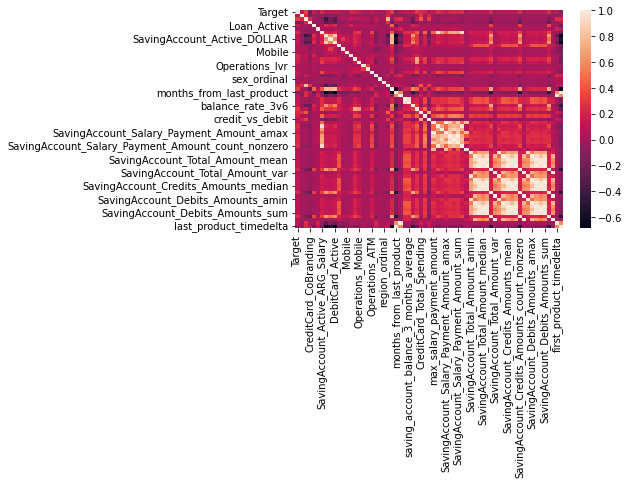

In [77]:
sns.heatmap(correlation)

In [78]:
corr_matrix = abt.copy().drop(['Target'], axis=1).corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool)).fillna(0)

columns_to_drop = [col for col in upper.columns if any(upper[col] > 0.8)]
columns_to_drop

['DebitCard_Active',
 'n_of_products_active',
 'saving_account_balance_3_months_average',
 'with_salary',
 'SavingAccount_Salary_Payment_Amount_amax',
 'SavingAccount_Salary_Payment_Amount_mean',
 'SavingAccount_Salary_Payment_Amount_median',
 'SavingAccount_Salary_Payment_Amount_sum',
 'SavingAccount_Salary_Payment_Amount_count_nonzero',
 'SavingAccount_Total_Amount_mean',
 'SavingAccount_Total_Amount_median',
 'SavingAccount_Total_Amount_sum',
 'SavingAccount_Credits_Amounts_amin',
 'SavingAccount_Credits_Amounts_amax',
 'SavingAccount_Credits_Amounts_mean',
 'SavingAccount_Credits_Amounts_median',
 'SavingAccount_Credits_Amounts_sum',
 'SavingAccount_Credits_Amounts_count_nonzero',
 'SavingAccount_Credits_Amounts_var',
 'SavingAccount_Debits_Amounts_amin',
 'SavingAccount_Debits_Amounts_amax',
 'SavingAccount_Debits_Amounts_mean',
 'SavingAccount_Debits_Amounts_median',
 'SavingAccount_Debits_Amounts_sum',
 'SavingAccount_Debits_Amounts_count_nonzero',
 'SavingAccount_Debits_Amounts

In [79]:
abt.shape

(26006, 66)

In [80]:
_abt = abt.copy()
abt.drop(columns_to_drop, axis = 1, inplace=True)
abt.shape

(26006, 38)

In [81]:
abt.columns

Index(['client_id', 'Target', 'CreditCard_Premium', 'CreditCard_Active',
       'CreditCard_CoBranding', 'Loan_Active', 'Mortgage_Active',
       'SavingAccount_Active_ARG_Salary', 'SavingAccount_Active_ARG',
       'SavingAccount_Active_DOLLAR', 'Investment_Active', 'Email', 'Mobile',
       'Operations_Terminal', 'Operations_HomeBanking', 'Operations_Mobile',
       'Operations_Ivr', 'Operations_Telemarketer', 'Operations_ATM',
       'client_age_group_ordinal', 'sex_ordinal', 'region_ordinal',
       'credit_card_product_ordinal', 'months_from_last_product',
       'months_from_first_product', 'saving_account_balance_6_months_average',
       'balance_rate_3v6', 'n_operations', 'CreditCard_Total_Spending',
       'SavingAccount_DebitCard_Spend_Amount', 'credit_vs_debit',
       'max_salary_payment_amount', 'SavingAccount_Salary_Payment_Amount_amin',
       'SavingAccount_Salary_Payment_Amount_var',
       'SavingAccount_Total_Amount_amin', 'SavingAccount_Total_Amount_amax',
       '

In [82]:
_abt.to_csv('./abt.csv', sep='|', index=False)

# Train RandomForest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
from sklearn.model_selection import train_test_split

X = abt.copy().drop(['Target'], axis=1)
y = abt['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [86]:
classifier.score(X_test, y_test)

0.8037682645475519